In [34]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
train=pd.read_csv('Downloads/Walmart-Sales-Forecasting-master/train.csv')
test=pd.read_csv('Downloads/Walmart-Sales-Forecasting-master/test.csv')
feat=pd.read_csv('Downloads/Walmart-Sales-Forecasting-master/features.csv')
stores=pd.read_csv('Downloads/Walmart-Sales-Forecasting-master/stores.csv')

In [3]:
feat_sto = feat.merge(stores, how='inner', on='Store')

In [4]:
feat_sto.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [5]:
feat_sto.Date = pd.to_datetime(feat_sto.Date)
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [6]:
feat_sto['Week'] = feat_sto.Date.dt.week 
feat_sto['Year'] = feat_sto.Date.dt.year

In [7]:
train_detail = train.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [8]:
test_detail = test.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [9]:
x=train_detail.drop('IsHoliday',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbec19e4080>,
      dtype=object)

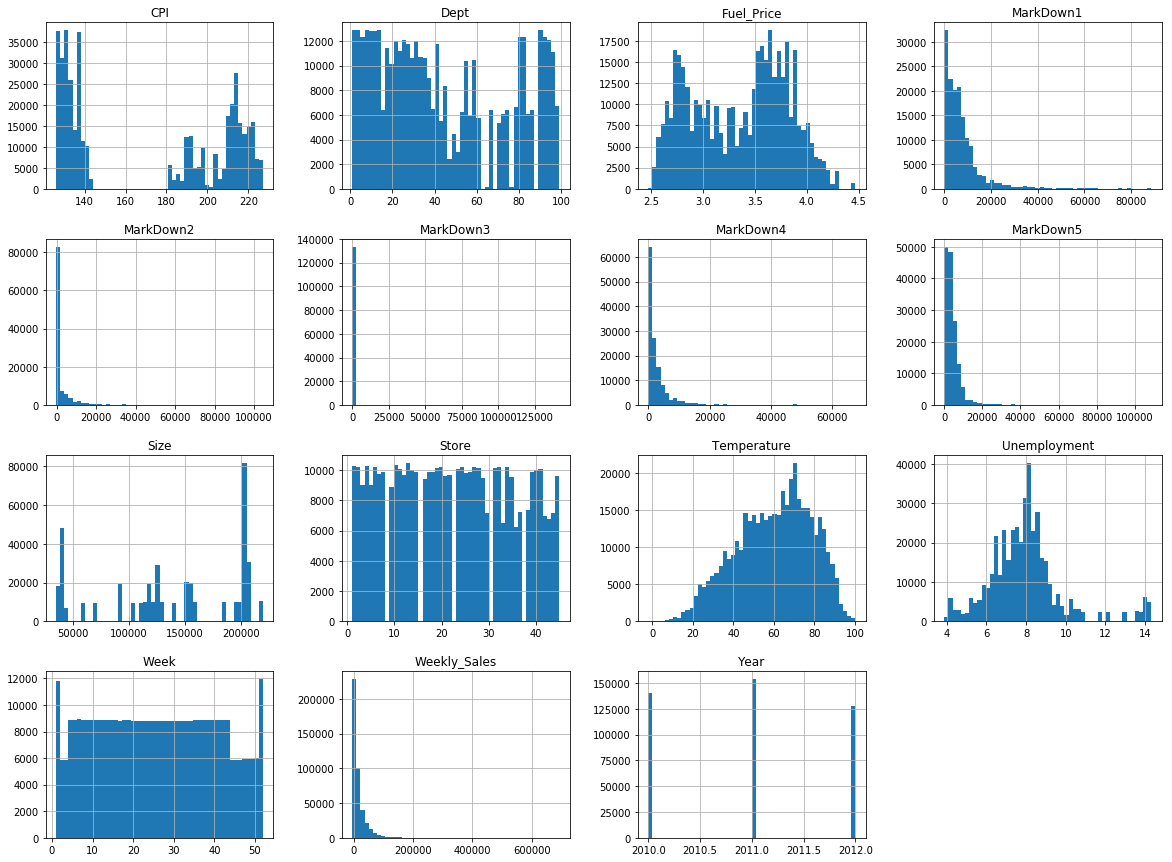

In [10]:
x.hist(bins=50,figsize=(20,15))

In [11]:
cr=train_detail.corr()

In [12]:
cr['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
Week            0.027673
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [13]:
data=[train_detail,test_detail]

In [14]:
holi={False:0,True:1}
for i in data:
    i['IsHoliday']=i['IsHoliday'].map(holi)

In [15]:
for i in data:
    i['Type']=OrdinalEncoder().fit_transform(i[['Type']])

In [16]:
imp=SimpleImputer(strategy='median')
train_detail=train_detail.drop('Date',axis=1)
test_detail=test_detail.drop('Date',axis=1)

In [17]:
imp.fit(train_detail)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [18]:
p=imp.transform(train_detail)

In [19]:
train_detail=pd.DataFrame(p,columns=train_detail.columns)

In [20]:
imp.fit(test_detail)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [21]:
q=imp.transform(test_detail)
test_detail=pd.DataFrame(q,columns=test_detail.columns)

In [22]:
train_detail.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1.0,1.0,24924.50,0.0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,0.0,151315.0,5.0,2010.0
1,1.0,1.0,46039.49,1.0,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,0.0,151315.0,6.0,2010.0
2,1.0,1.0,41595.55,0.0,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,0.0,151315.0,7.0,2010.0
3,1.0,1.0,19403.54,0.0,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,0.0,151315.0,8.0,2010.0
4,1.0,1.0,21827.90,0.0,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,0.0,151315.0,9.0,2010.0


In [23]:
train_detail['Year'].value_counts()

2011.0    153453
2010.0    140679
2012.0    127438
Name: Year, dtype: int64

In [24]:
yr={2010.0:0,2011.0:1,2012.0:2}

train_detail['Year']=train_detail['Year'].map(yr)

In [25]:
test_detail['Year']=test_detail['Year'].map(yr)

In [26]:
train_detail.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1.0,1.0,24924.50,0.0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,0.0,151315.0,5.0,0
1,1.0,1.0,46039.49,1.0,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,0.0,151315.0,6.0,0
2,1.0,1.0,41595.55,0.0,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,0.0,151315.0,7.0,0
3,1.0,1.0,19403.54,0.0,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,0.0,151315.0,8.0,0
4,1.0,1.0,21827.90,0.0,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,0.0,151315.0,9.0,0


In [27]:
sc=StandardScaler()
xtrain=train_detail.drop('Weekly_Sales',axis=1)
ytrain=train_detail['Weekly_Sales']

In [28]:
xtrain=sc.fit_transform(xtrain)

/home/tabshir/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tabshir/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
model1=RandomForestRegressor()

In [30]:
model1.fit(xtrain,ytrain)

/home/tabshir/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
test_detail['Year']=test_detail['Year'].fillna(2.0)

In [32]:
xtest=sc.fit_transform(test_detail)

In [33]:
pred=model1.predict(xtrain)

In [36]:
scores=cross_val_score(model1,xtrain,ytrain,scoring='neg_mean_squared_error',cv=10)

In [35]:
np.sqrt(mean_squared_error(ytrain,pred))

1553.570606246645

In [37]:
print('tarek jahidul sifat mahbub rahat')

tarek jahidul sifat mahbub rahat


In [38]:
b=np.sqrt(-scores)

In [41]:
b.mean()

12428.579379964756

In [52]:
pred=model1.predict(xtest)

In [42]:
sub=pd.read_csv('Downloads/sampleSubmission.csv')

In [51]:
sub.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [53]:
sub=pd.DataFrame({'Id':sub['Id'],'Weekly_Sales':pred})
sub.to_csv('billul.csv',index=False)

In [ ]:
#kaggle score 4897.06845